In [179]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import seaborn as sns

%matplotlib inline

boxes = []

In [180]:
def LR(X_train, y_train, X_test):
    clf = LinearRegression(normalize=False)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return (clf, y_pred)

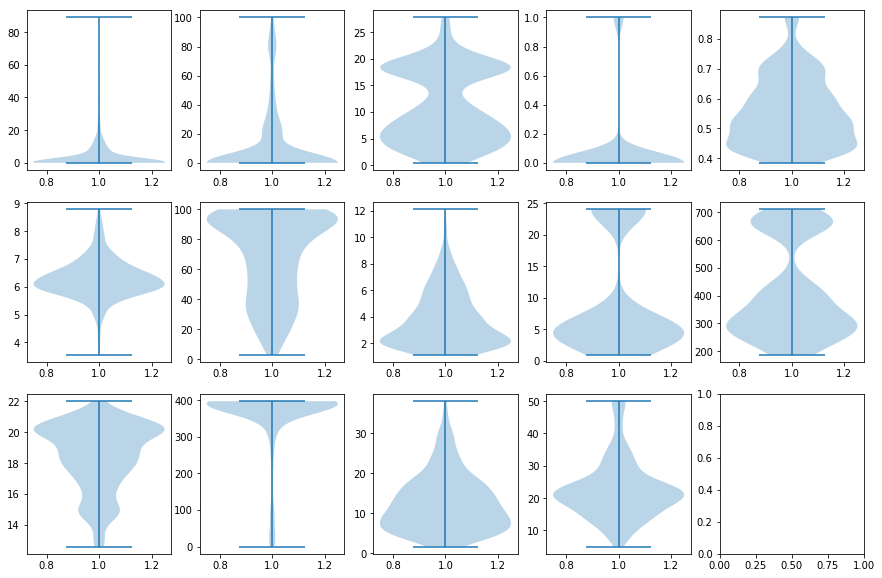

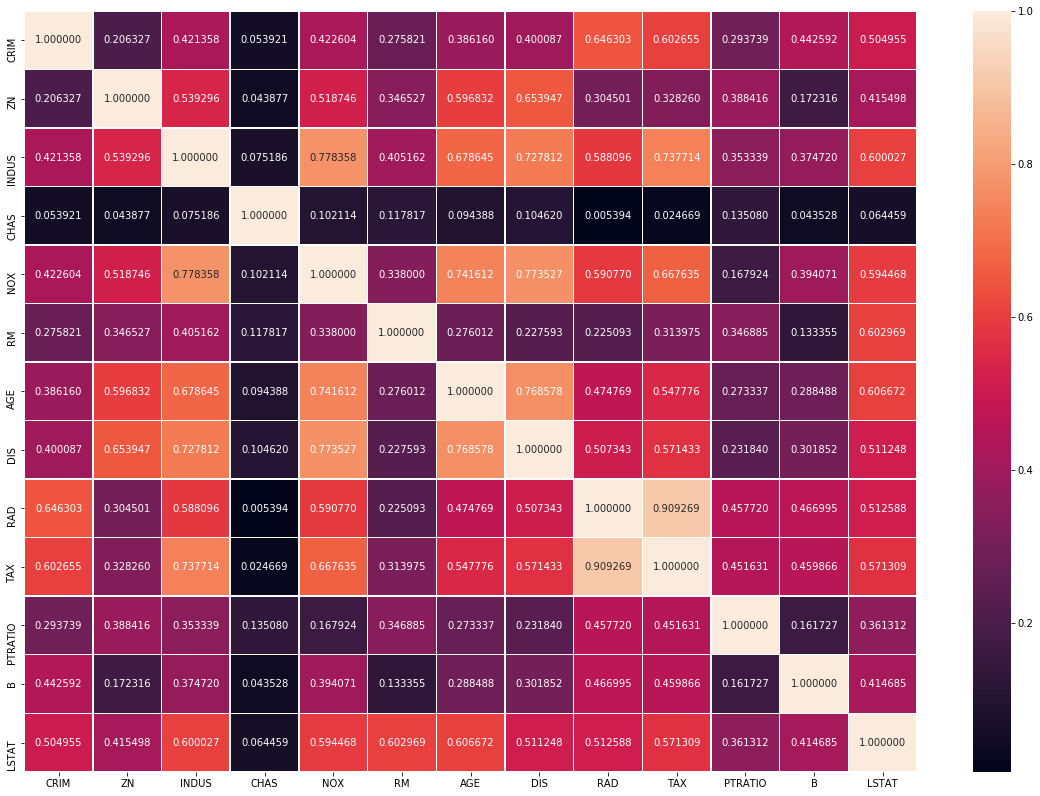

In [181]:
df = pd.read_csv('boston_house_prices.csv', skiprows=(0, 0))
X = df.drop(columns=['MEDV'], axis=1)
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

clf, y_pred = LR(X_train, y_train, X_test)
# print(clf.coef_)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
j = 0
coef = 5
for i, col in enumerate(df.columns):
    if i % coef == 0 and i > 0:
        j += 1
    axes[j, i % coef].violinplot(df[col])

# plt.plot(clf.coef_)

# x = np.array(list("ABCDEFGHIJ"))
# y1 = np.arange(0, len(clf.coef_))
# sns.barplot(y1, clf.coef_, palette="summer", ax=ax)

f, ax = plt.subplots(figsize=(20, 14))
sns.heatmap(X_train.corr().abs(), annot=True, fmt="f", linewidths=.5, ax=ax)

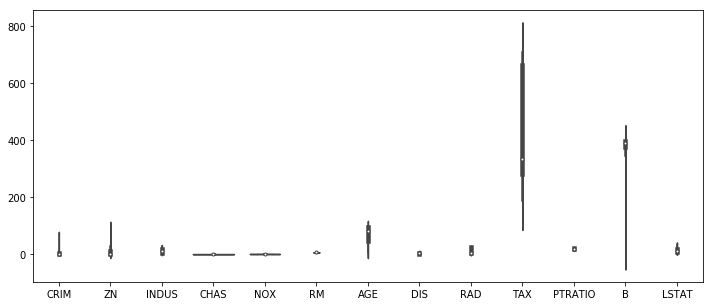

In [182]:
fig, ax = plt.subplots(figsize=(12,5))
sns.violinplot(data=X_train, ax=ax)

In [183]:
def draw(X_train, y_train, X_test):
    clf, y_pred = LR(X_train, y_train, X_test)
#     plt.plot(y_test)
#     plt.plot(y_pred)
    fig, ax = plt.subplots()
    cv = cross_val_score(clf, X_test, y_test, cv=5)
    ax.boxplot(cv)
    boxes.append(cv)
    
    
    X_test.corr().abs()
    
    print('Accuracy: {}'.format(r2_score(y_test, y_pred)))

In [184]:
plt.figure(figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

Accuracy: 0.7339146059116315


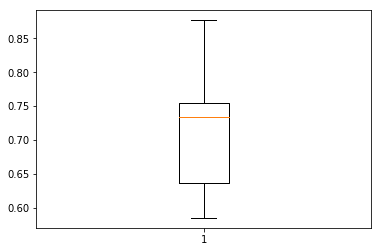

In [185]:
draw(X_train, y_train, X_test)

In [186]:
def removeColumn(name):
    global X_train, X_test
    X_train = X_train.drop(columns=[name], axis=1)
    X_test = X_test.drop(columns=[name], axis=1)

Accuracy: 0.7383647057568998


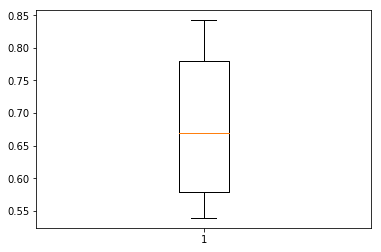

In [187]:
removeColumn('LSTAT')
draw(X_train, y_train, X_test)

Accuracy: 0.7189033499063817


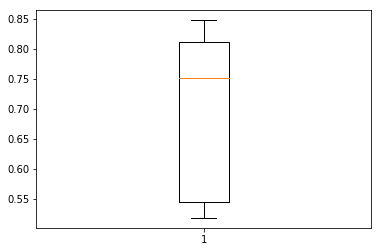

In [188]:
removeColumn('DIS')
draw(X_train, y_train, X_test)

Accuracy: 0.7206134415331262


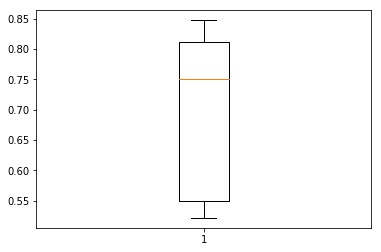

In [189]:
removeColumn('INDUS')
draw(X_train, y_train, X_test)

Accuracy: 0.7014638478553316


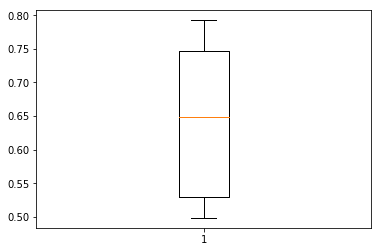

In [190]:
removeColumn('CRIM')
draw(X_train, y_train, X_test)

Accuracy: 0.6984320402718553


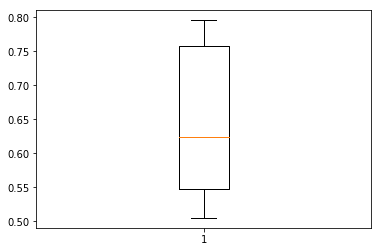

In [191]:
removeColumn('AGE')
draw(X_train, y_train, X_test)

Accuracy: 0.6936138060335042


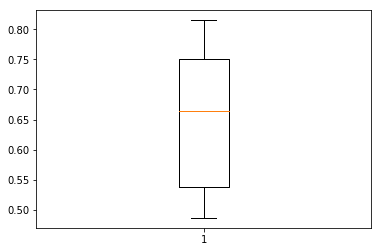

In [192]:
removeColumn('RAD')
draw(X_train, y_train, X_test)

Accuracy: 0.6928865134216678


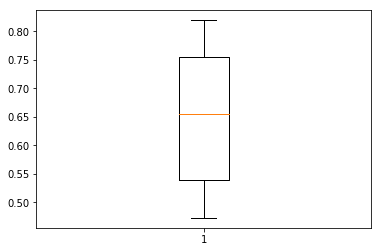

In [193]:
removeColumn('TAX')
draw(X_train, y_train, X_test)

In [194]:
X_train.corr().abs()

,ZN,CHAS,NOX,RM,PTRATIO,B
ZN,1.000000,0.043877,0.518746,0.346527,0.388416,0.172316
CHAS,0.043877,1.000000,0.102114,0.117817,0.135080,0.043528
NOX,0.518746,0.102114,1.000000,0.338000,0.167924,0.394071
RM,0.346527,0.117817,0.338000,1.000000,0.346885,0.133355
PTRATIO,0.388416,0.135080,0.167924,0.346885,1.000000,0.161727
B,0.172316,0.043528,0.394071,0.133355,0.161727,1.000000


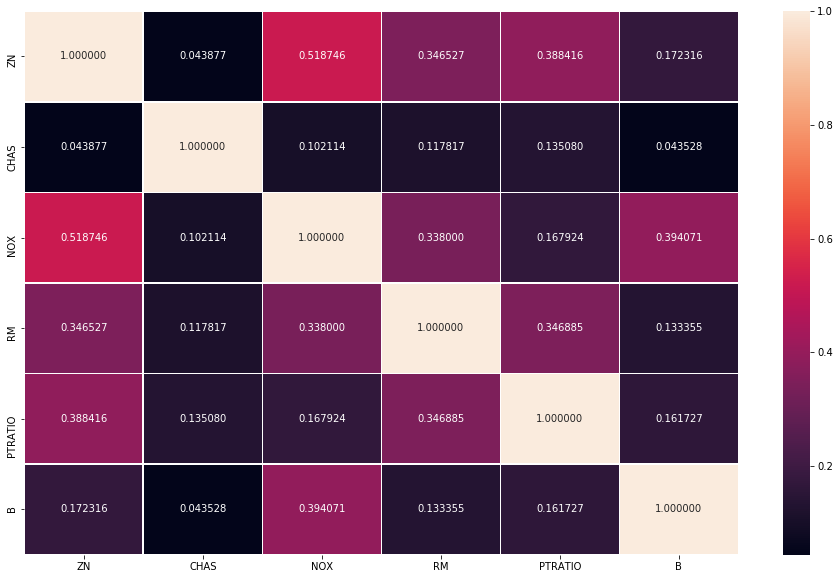

In [195]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(X_train.corr().abs(), annot=True, fmt="f", linewidths=.5, ax=ax)

In [2]:
fig, ax = plt.subplots(figsize=(15, 10))
lens = np.array(clf.coef_)
ax.barh(np.arange(len(X.columns)), lens, align='center', color='green', ecolor='black')
ax.set_yticklabels(X.columns)
plt.show()
clf.coef_

NameError: name 'plt' is not defined

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29976128>,
 'caps': [<matplotlib.lines.Line2D at 0x1a298e24e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29976278>,
 'medians': [<matplotlib.lines.Line2D at 0x1a298e2ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a298e2a90>,
 'means': []}

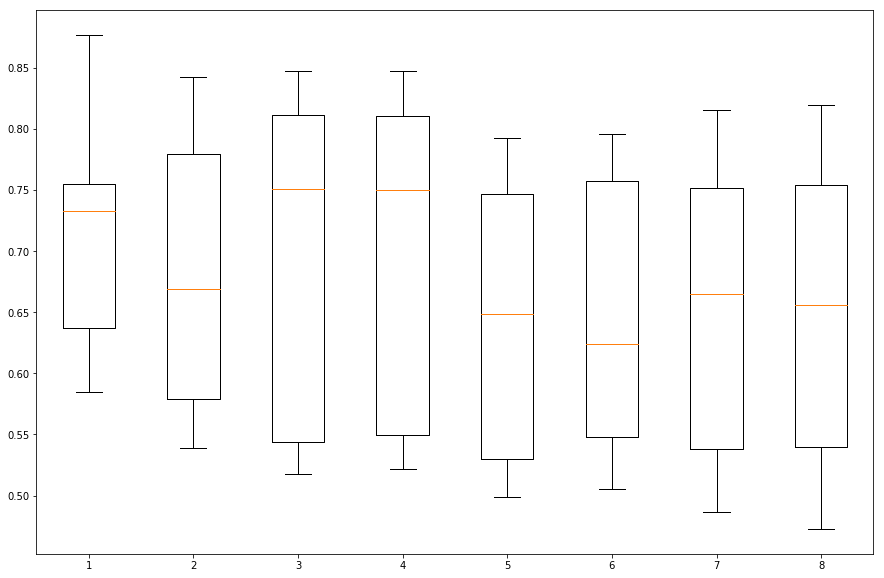

In [197]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
# fig, ax = plt.subplots(nrows=1, ncols=len(boxes), figsize=(15, 10))

# for box in boxes:
ax.boxplot(boxes)